# Exercise 1

## Exercise 1.1

write a code that prints the following pattern. Try to use as few loops as possible.

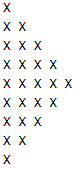

Avoid using trivial solutions like:

print('X') 

print('X X')

print('X X X')

.....

print('X X X')

print('X X')

print('X')


In [61]:
max_n = 5

for i in range(1, max_n + 1):
    print(" ".join(["X"] * i))

for i in range(max_n - 1, 0, -1):
    print(" ".join(["X"] * i))

X
X X
X X X
X X X X
X X X X X
X X X X
X X X
X X
X


## Exercise 1.2

Write a script that will sum all numbers in the following string. You can split each number into single digits, so for example, you can consider 45 to be 4 and 5

In [62]:
input_str = "n45as29@#8ss6"
total = 0
for char in input_str:
    if char.isdigit():
        total += int(char)

print(total)

34


## Exercise 1.3

Write a script that will convert an arbitrary integer to a binary number (the number will be represented as a string with only *0* and *1*). Avoid using the *bin()* function or any other pythons default functions

In [63]:
def to_binary(n: int) -> str:
    if n == 0:
        return "0"

    result = ""
    while n > 0:
        result = str(n % 2) + result
        n //= 2

    return result

print(to_binary(10))

1010


## Exercise 1.4 - The Fibonacci Sequence:

The Fibonacci Sequence is a series of numbers. The following number is found by adding up the two numbers before it. The first two numbers are 0 and 1. For example, 0, 1, 1, 2, 3, 5, 8, 13. The following number in this series above is 8 + 13 = 21


Your task is to implement a function *fibonacci* that takes an integer as an input and returns a list that contains all Fibonacci numbers with values lower than the input integer

Example:

*print(fibonaci(10))*

[0, 1, 1, 2, 3, 5, 8]


In [64]:
def fibonacci(upper_threshold: int) -> list:
    fib = [0, 1]
    while fib[-1] + fib[-2] < upper_threshold:
        fib.append(fib[-1] + fib[-2])
    return fib

print(fibonacci(10))

[0, 1, 1, 2, 3, 5, 8]


#### Advanced

Try to implement the function using multiple approaches: *Iterative approach*, *Recusrion*, *Memoization*

In [65]:
def fib_recursive(n: int) -> int:
    if n <= 1:
        return n
    return fib_recursive(n - 1) + fib_recursive(n - 2)


## Exercise 1.5. -  Rock, Paper, Scissors game:

#### basic

*Rock, Paper, Scissors* is a well-known and straightforward game. If you do not know the rules, google them. We will write a code for the Rock, Paper, Scissors game where the user plays against a random computer. The code can be written into one function *rock_paper_scissors*.

Notes:
- This implementation uses the **random** library to enable the computer to make a random choice.
- Keyword **Input** may be helpful. Check it
- After the function is run, the program will ask you about your movement, which you type in
- The game is case-insensitive for user input (e.g., "rock", "Rock", and "ROCK" are all valid).
- This script plays one round of the game.
- The script prints the result ('You lose', 'You win', 'It is a tie')


In [66]:
def rock_paper_scissors() -> None:
    print('I am empty')

rock_paper_scissors()

I am empty


In [89]:
import random

def rock_paper_scissors() -> None:
    choices = ["rock", "paper", "scissors"]
    user = input("Choose rock, paper or scissors: ").lower()
    computer = random.choice(choices)

    print("Computer chose:", computer)

    if user == computer:
        print("Draw!")
    elif (user == "rock" and computer == "scissors") or \
         (user == "paper" and computer == "rock") or \
         (user == "scissors" and computer == "paper"):
        print("You win!")
    else:
        print("You lose!")

rock_paper_scissors()

Choose rock, paper or scissors: rock
Computer chose: rock
Draw!


#### Advanced

Extend the Rock, Paper, Scissors game to be able to play *n* rounds. 

Notes: 
- The scrips will contain two counters - user score and computer score
- After each run, the script prints the current scores and rounds.
- When the number of rounds is reached, the script prints the result ('You lose', 'You win', 'It is a tie')

# Exercise 2

The purpose of this excercise is to practise working with NumPy library

## Exercise 2.1


In this exercise, you will work with NumPy arrays and learn how to efficiently modify and process them using both loops and vectorized operations. Your task is to:

1. Implement the function *create_array_nxn* that generates an n×n NumPy array filled with numbers from n² - 1 down to 0
2. Using a loop-based approach (for-loop, while-loop), implement the function *apply_threshold_loop* that takes any NumPy array and replaces all numbers below a user-defined threshold with 0.
3. Implement function *apply_threshold_vectorized* that performs the same operation as *apply_threshold_loop*, but without loops, using NumPy vectorized operations
4. Implement function *compare_performance* that compares the execution time of functions *apply_threshold_vectorized* and *apply_threshold_loop* with **time** library and print the results


**Additional Notes**:

- Ensure n is a positive integer (n > 0).
- Use the time library to measure execution times for performance comparison.
- The function *compare_performance(n, threshold)* should:
    - Generate an n×n array.
    - Apply both loop-based and vectorized thresholding.
    - Print execution times.

In [90]:
import numpy as np
import time

In [91]:
def create_array_nxn(n: int) -> np.ndarray:
    if n <= 0:
        raise ValueError("n must be > 0")
    return np.arange(n*n - 1, -1, -1).reshape(n, n)

print(create_array_nxn(3))


[[8 7 6]
 [5 4 3]
 [2 1 0]]


In [92]:
def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
    out = arr.copy()
    rows, cols = out.shape
    for i in range(rows):
        for j in range(cols):
            if out[i, j] < threshold:
                out[i, j] = 0
    return out

In [93]:
def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
    out = arr.copy()
    out[out < threshold] = 0
    return out

In [94]:
def compare_performance(n: int, threshold: int) -> None:
    arr = create_array_nxn(n)

    start = time.time()
    _ = apply_threshold_loop(arr, threshold)
    loop_time = time.time() - start

    start = time.time()
    _ = apply_threshold_vectorized(arr, threshold)
    vec_time = time.time() - start

    print(f"Loop time: {loop_time:.6f} s")
    print(f"Vectorized time: {vec_time:.6f} s")

compare_performance(500, 100000)

Loop time: 0.045200 s
Vectorized time: 0.000185 s


## Exercise 2.2 - Digi display

#### basic

The task will be to create a simulation of a Digi display that will be able to display an arbitrary integer
   
*hint: to show the image, use the library matplotlib.pyplot. Also, you may find function *np.concatenate* helpful

In [95]:
import matplotlib.pyplot as plt

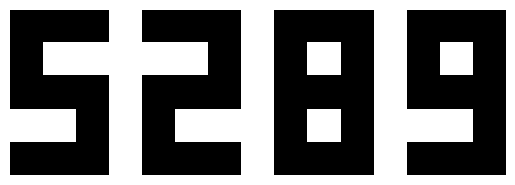

In [110]:
def show_in_digi(input_integer: int) -> None:
    digits = str(input_integer)
    blocks = []

    for d in digits:
        blocks.append(numbs[d])
        blocks.append(np.zeros((5, 1), dtype=int))

    blocks = blocks[:-1] 
    final = np.concatenate(blocks, axis=1)

    plt.imshow(final, cmap="gray_r")
    plt.axis("off")
    plt.show()

show_in_digi(5289)

show_in_digi(5289) will show:


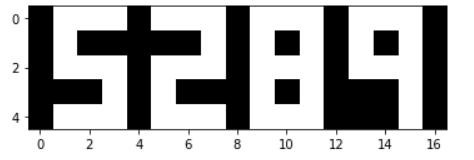

*hint2: you may find the following dict usefull*

In [111]:
numbs = {
      "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 1
      "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]), # 2
      "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 3
      "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]), # 4
      "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 5
      "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 6
      "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 7
      "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 8
      "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 9
      "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]), # 0
  }

#### advanced

Extend your *show_in_digi* function to be able to display an arbitary float number and negative numbers

# Exercise 3 - Playing with California Housing Dataset

The purpose of this exercise is to learn basic operations of **pandas** library. Use *california_housing_dataset* you can find in google colab to do following operations:

In [98]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
dataset = housing.frame  

dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- check what *dataset.describe()* does

In [99]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


- display all rows where *total_bedrooms* column is bigger than 310

In [100]:
dataset[dataset["AveBedrms"] > 3.10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1024,3.1500,16.0,29.852941,5.323529,202.0,1.980392,38.52,-120.00,1.406
1102,2.4028,17.0,31.777778,9.703704,47.0,1.740741,40.06,-121.54,0.675
1233,3.7500,10.0,16.847534,3.237668,546.0,2.448430,38.23,-120.34,1.214
1234,4.4063,13.0,28.757282,5.300971,252.0,2.446602,38.26,-120.33,1.558
1238,3.3542,10.0,28.112903,5.604839,298.0,2.403226,38.29,-120.27,1.038
...,...,...,...,...,...,...,...,...,...
19976,3.1250,10.0,21.095238,5.285714,48.0,2.285714,36.19,-118.37,0.713
19977,2.3937,20.0,18.793522,5.263158,658.0,2.663968,35.82,-118.70,0.821
20093,2.0625,37.0,24.669118,4.897059,338.0,2.485294,38.12,-120.12,0.889
20094,2.1250,26.0,37.063492,7.185185,416.0,2.201058,38.19,-120.03,1.325


- drop also first and last row

In [101]:
dataset = dataset.iloc[1:-1].copy()

- save a mean of values in *households* columns to variable, using *matplotlib* display number of households in the graph (x-axis would be ID, y-axis - numbers of households) as dots with the same color, display also mean as a single line in the graph with different color as dots is

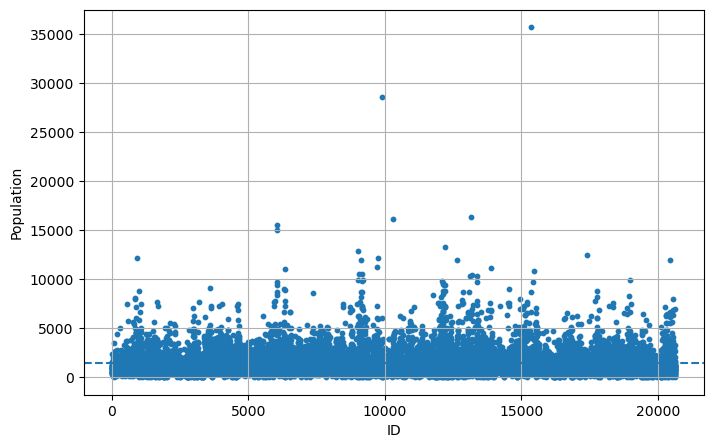

In [115]:
plt.figure(figsize=(8,5))

mean_pop = dataset["Population"].mean()

plt.scatter(dataset.index, dataset["Population"], s=10)
plt.axhline(mean_pop, linestyle="--")
plt.xlabel("ID")
plt.ylabel("Population")
plt.grid()

plt.show()

 - check if any of the columns contain NaN values, if yes, replace the NaN values with the arithmetic mean of the whole dataset 

In [116]:
dataset.isna().sum() 

dataset = dataset.fillna(dataset.mean(numeric_only=True))

 - display *lat* and *long* into plot, *lat* would be on *x* axis and *long* on *y* axis 

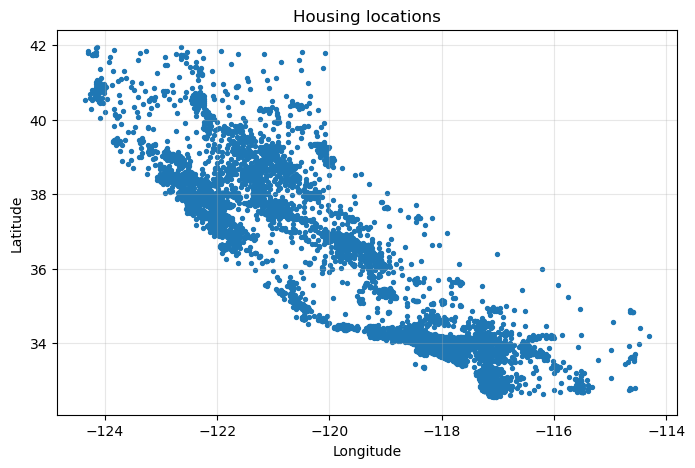

In [118]:
plt.figure(figsize=(8,5))

plt.scatter(dataset["Longitude"], dataset["Latitude"], s=8)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing locations")
plt.grid(alpha=0.3)

plt.show()

- choose two arbitrary columns and normalize all values inside using *min-max normalization*:

In [105]:
cols = ["MedInc", "HouseAge"]

for c in cols:
    dataset[c] = (dataset[c] - dataset[c].min()) / (dataset[c].max() - dataset[c].min())

dataset[cols].head()

,MedInc,HouseAge
1,0.538027,0.392157
2,0.466028,1.000000
3,0.354699,1.000000
4,0.230776,1.000000
5,0.243921,1.000000


- Create a Correlation Matrix from all columns 

In [106]:
corr = dataset.corr(numeric_only=True)
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119207,0.326873,-0.062027,0.004945,0.018773,-0.079882,-0.015060,0.687989
HouseAge,-0.119207,1.000000,-0.153320,-0.077737,-0.296221,0.013192,0.011209,-0.108186,0.105492
AveRooms,0.326873,-0.153320,1.000000,0.847636,-0.072186,-0.004851,0.106375,-0.027504,0.151902
AveBedrms,-0.062027,-0.077737,0.847636,1.000000,-0.066206,-0.006181,0.069724,0.013341,-0.046684
Population,0.004945,-0.296221,-0.072186,-0.066206,1.000000,0.069862,-0.108746,0.099717,-0.024555
AveOccup,0.018773,0.013192,-0.004851,-0.006181,0.069862,1.000000,0.002373,0.002471,-0.023738
Latitude,-0.079882,0.011209,0.106375,0.069724,-0.108746,0.002373,1.000000,-0.924675,-0.144217
Longitude,-0.015060,-0.108186,-0.027504,0.013341,0.099717,0.002471,-0.924675,1.000000,-0.045880
MedHouseVal,0.687989,0.105492,0.151902,-0.046684,-0.024555,-0.023738,-0.144217,-0.045880,1.000000


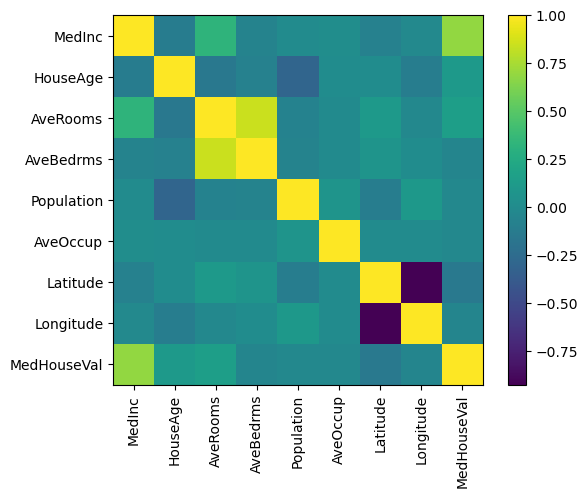

In [107]:
plt.imshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()